<a href="https://colab.research.google.com/github/gibranfp/CursoAprendizajeProfundo/blob/master/notebooks/2d_cnn_mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MobileNet

#### <div style="text-align: right"> Berenice Montalvo Lezama </div>

[MobileNet](https://arxiv.org/pdf/1704.04861.pdf) es una red neuronal convolucional que ha sido empleada en aplicaciones de visión para dispositivos móviles.  En este ejemplo veremos como usar MobileNet -v2 para la tarea de clasificación de imágenes sobre el conjunto de datos de CIFAR-10.

## 1 Carga de datos

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import os
# listar el sistema de archivos
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import Model

tf.random.set_seed(2019)

cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()

In [2]:
# para deserialización de etiquetas
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

labels_names = unpickle(os.path.expanduser('~/.keras/datasets/cifar-10-batches-py/batches.meta'))
labels_names = [l.decode('utf-8') for l in labels_names[b'label_names']]

Una vez descargadas las imágenes, podemos visualizar algunas para ver cómo lucen.

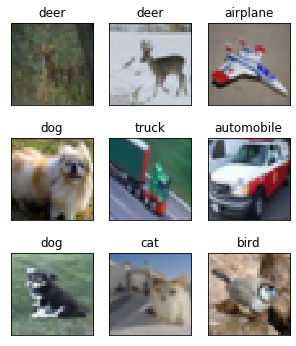

In [3]:
plt.figure(figsize=(5, 6))
for i in range(1, 10):
    plt.subplot(330 + i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[10 * i], cmap='Greys')
    img = y_train[10 * i][0]
    label = labels_names[img]
    plt.title(label)

Ahora normalizamos las imágenes.

In [4]:
x_train, x_test = tf.cast(x_train, tf.float32) / 255.0, tf.cast(x_test, tf.float32) / 255.0

## 2 Definición del modelo

In [5]:
# Se crea una instancia del modelo
base_model = tf.keras.applications.MobileNet(weights= None, include_top=False, input_shape=(32,32,3))
# se imprime la arquitectura del modelo
base_model.summary()

Model: "mobilenet_1.00_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32)  

Agregamos las capas de clasificación.

In [6]:
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation= 'relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(10, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

Imprimimos la arquitectura de nuestro modelo

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32)        128   

Configuramos el modelo para el entrenamiento.

In [8]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Entrenamos el modelo.

In [9]:
model.fit(x_train, y_train, batch_size = 32, epochs = 50)

Train on 50000 samples
Epoch 1/50
50000/50000 [==============================] - 34s 688us/sample - loss: 1.8480 - accuracy: 0.3092
Epoch 2/50
50000/50000 [==============================] - 30s 597us/sample - loss: 1.5272 - accuracy: 0.4477
Epoch 3/50
50000/50000 [==============================] - 30s 594us/sample - loss: 1.3609 - accuracy: 0.5196
Epoch 4/50
50000/50000 [==============================] - 31s 622us/sample - loss: 1.2134 - accuracy: 0.5810
Epoch 5/50
50000/50000 [==============================] - 31s 613us/sample - loss: 1.0947 - accuracy: 0.6233
Epoch 6/50
50000/50000 [==============================] - 30s 609us/sample - loss: 0.9905 - accuracy: 0.6622
Epoch 7/50
50000/50000 [==============================] - 30s 606us/sample - loss: 0.9047 - accuracy: 0.6920
Epoch 8/50
50000/50000 [==============================] - 30s 595us/sample - loss: 0.8274 - accuracy: 0.7219
Epoch 9/50
50000/50000 [==============================] - 31s 620us/sample - loss: 0.7595 - accuracy: 0.7

## 3 Prueba


Evaluamos el modelo con los datos de prueba.

In [10]:
model.evaluate(x_test, y_test, batch_size=64, verbose=1)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.0742351247787476, 0.766]